# **Data Mining and Machine Learning**

##Introduction

This project focuses on analyzing customer churn, a critical metric for businesses, using data mining techniques—specifically classification with decision trees. Customer churn refers to the phenomenon where customers discontinue their relationship with a company, which can significantly impact a business's profitability. Understanding the factors driving churn allows companies to take preemptive measures to retain customers, improve satisfaction, and ultimately reduce attrition.

In this project, we will apply the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to analyze a dataset of customer attributes. The goal is to develop a decision tree classifier to predict whether a customer is likely to churn (Y for yes, N for no). We will evaluate the model’s performance through metrics such as accuracy, precision, recall, and f-measure. Additionally, the project aims to explore which factors are most influential in predicting churn, enabling businesses to identify potential churners and devise strategies to retain them.
<br>
<br>
We will use this file to pinpoint potential churners for Business.
<br>
VARIABLE DESCRIPTIONS:<br>
cust_id: Customer ID<br>
region: Customer's region<br>
tenure: How long the customer has been with the company<br>
age: Customer's age<br>
marital: Marital status<br>
address: Address longevity (how many years at the current address)<br>
income: Customer's income level<br>
ed: Education level<br>
employ: Employment years<br>
retire: Retired or not (Y/N)<br>
gender: Gender of the customer<br>
reside: Number of residents at the same address<br>
tollfree: Toll-free service subscription (Y/N)<br>
equip: Equipment purchase (Y/N)<br>
callcard: Call card usage (Y/N)<br>
wireless: Wireless service (Y/N)<br>
longmon, tollmon, equipmon, cardmon, wiremon: Monthly charges for long distance, toll-free, equipment, calling card, and wireless services<br>
longten, tollten, equipten, cardten, wireten: Total tenure charges for the respective services<br>
multline: Multi-line service (Y/N)<br>
voice, pager, internet, callid, callwait, forward, confer: Usage of voice, pager, internet, caller ID, call waiting, call forwarding, and conference calls<br>
ebill: Electronic billing (Y/N)<br>
loglong: Log of long-term monthly charge<br>
lninc: Log of income<br>
custcat: Customer category (C1, C2, etc.)<br>
churn: Whether the customer churned (Y/N)<br>
<br>
Target variable: **Churn (churn: Y (yes), churn:
N(no))**


##1. Data Understanding and Preprocessing

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
# Read data
cust_chur = pd.read_csv("/content/drive/MyDrive/IS470_data/CutomerChurnData.csv")
cust_chur

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


In [5]:
cust_chur.keys()

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
# Select the desired columns only
desired_columns = ['tenure', 'age', 'income', 'longmon', 'wiremon', 'region', 'marital', 'gender', 'custcat', 'tollfree', 'wireless', 'internet', 'callid', 'callwait', 'ebill', 'churn']
cust_chur_desired = cust_chur [desired_columns]

In [7]:
# Creating copy of cust_chur_desired
cust_chur_2 = cust_chur_desired.copy()

In [8]:
# Show the head rows of a data frame
cust_chur.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


In [9]:
# Examine missing values again
cust_chur.isnull().sum()

,0
cust_id,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0


In [10]:
# Examine variable type
cust_chur.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
marital,object
address,int64
income,int64
ed,object
employ,int64
retire,object


In [11]:
# Change categorical variables to "category"
cust_chur['cust_id'] = cust_chur['cust_id'].astype('category')
cust_chur['region'] = cust_chur['region'].astype('category')
cust_chur['marital'] = cust_chur['marital'].astype('category')
cust_chur['ed'] = cust_chur['ed'].astype('category')
cust_chur['retire'] = cust_chur['retire'].astype('category')
cust_chur['gender'] = cust_chur['gender'].astype('category')
cust_chur['tollfree'] = cust_chur['tollfree'].astype('category')
cust_chur['equip'] = cust_chur['equip'].astype('category')
cust_chur['callcard'] = cust_chur['callcard'].astype('category')
cust_chur['wireless'] = cust_chur['wireless'].astype('category')
cust_chur['multline'] = cust_chur['multline'].astype('category')
cust_chur['voice'] = cust_chur['voice'].astype('category')
cust_chur['pager'] = cust_chur['pager'].astype('category')
cust_chur['internet'] = cust_chur['internet'].astype('category')
cust_chur['callid'] = cust_chur['callid'].astype('category')
cust_chur['callwait'] = cust_chur['callwait'].astype('category')
cust_chur['forward'] = cust_chur['forward'].astype('category')
cust_chur['confer'] = cust_chur['confer'].astype('category')
cust_chur['ebill'] = cust_chur['ebill'].astype('category')
cust_chur['custcat'] = cust_chur['custcat'].astype('category')
cust_chur['churn'] = cust_chur['churn'].astype('category')


In [12]:
# Examine variable type
cust_chur.dtypes

,0
cust_id,category
region,category
tenure,int64
age,int64
marital,category
address,int64
income,int64
ed,category
employ,int64
retire,category


In [13]:
# Display all numeric variables
cust_chur.select_dtypes(include=['number'])

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
0,13,44,9,64,5,2,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.00,110,0.0,1.308,4.159
1,68,52,24,116,29,2,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.00,2150,0.0,2.899,4.754
2,23,30,9,30,2,4,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.00,0,0.0,1.841,3.401
3,45,22,2,19,4,5,10.90,0.00,0.0,8.75,0.0,504.50,0.00,0.00,415,0.0,2.389,2.944
4,45,59,7,166,31,5,9.75,28.50,0.0,12.00,0.0,449.05,1240.15,0.00,505,0.0,2.277,5.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,43,6,27,4,1,15.00,45.25,0.0,52.75,0.0,817.85,2320.25,0.00,2645,0.0,2.708,3.296
996,34,52,2,106,19,2,4.95,19.00,0.0,13.50,0.0,153.50,649.35,0.00,430,0.0,1.599,4.663
997,15,46,17,63,1,2,3.70,16.50,42.5,0.00,33.1,40.55,207.35,547.95,0,475.3,1.308,4.143
998,7,34,2,22,5,1,4.65,0.00,25.6,0.00,0.0,29.35,0.00,179.10,0,0.0,1.537,3.091


In [14]:
# Display all categorical variables
cust_chur.select_dtypes(include=['category'])

,cust_id,region,marital,ed,retire,gender,tollfree,equip,callcard,wireless,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,C00124,R2,Y,E4,N,N,N,N,Y,N,...,N,N,N,N,N,Y,N,N,C1,Y
1,C00125,R3,Y,E1,N,Y,Y,N,Y,N,...,N,N,N,Y,Y,N,Y,N,C3,N
2,C00126,R2,Y,E1,N,N,N,N,N,N,...,N,N,N,Y,N,Y,Y,N,C3,N
3,C00127,R3,Y,E2,N,Y,N,N,Y,N,...,N,N,Y,N,Y,N,N,Y,C2,Y
4,C00128,R3,Y,E4,N,N,Y,N,Y,N,...,N,N,N,Y,Y,Y,Y,N,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,N,E3,N,N,Y,N,Y,N,...,N,N,N,Y,Y,Y,Y,N,C3,N
996,C01120,R1,Y,E2,N,N,Y,N,Y,N,...,N,N,Y,Y,N,Y,Y,N,C3,N
997,C01121,R1,Y,E5,N,N,Y,Y,N,Y,...,Y,Y,Y,Y,N,Y,Y,Y,C4,Y
998,C01122,R1,N,E5,N,Y,N,Y,N,N,...,N,N,N,N,N,N,N,N,C1,N


###a. Understanding a single variable: numeric variables

In [15]:
# Show the statistics of a numeric variable: tenure
cust_chur['tenure'].describe()

,tenure
count,1000.000000
mean,35.242000
std,21.295937
min,1.000000
25%,16.000000
50%,34.500000
75%,53.000000
max,72.000000


In [16]:
# Show the statistics of two numeric variables: tenure, age, income, longmon, tollmon, equipmon, cardmon, wiremon, longten, tollten, equipten, cardten, wireten, loglong and lninc.
cust_chur[['tenure','age','income','longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon','longten', 'tollten', 'equipten', 'cardten', 'wireten', 'loglong', 'lninc']].describe()

,tenure,age,income,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,71.906000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,80.297826,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,9.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,28.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,46.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,83.250000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,732.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


In [17]:
# obtain the max value of a numeric variable: tenure
cust_chur['tenure'].max()

72

In [18]:
# Find the cust_chur with the highest tenure value
cust_chur[cust_chur['tenure'] == cust_chur['tenure'].max()]

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
103,C00227,R1,72,69,Y,49,44,E2,44,Y,...,N,N,Y,N,Y,N,4.605,3.784,C3,N
104,C00228,R3,72,64,N,41,674,E4,37,N,...,N,Y,Y,Y,Y,N,3.904,6.513,C3,N
109,C00233,R2,72,61,Y,39,76,E3,21,N,...,Y,Y,Y,Y,Y,N,4.004,4.331,C4,N
179,C00303,R1,72,52,Y,21,63,E1,24,N,...,N,Y,Y,Y,Y,N,3.736,4.143,C3,N
244,C00368,R1,72,55,Y,28,40,E1,11,N,...,N,N,N,N,N,N,3.534,3.689,C2,N
263,C00387,R3,72,60,Y,36,271,E1,43,N,...,N,Y,Y,Y,Y,N,3.077,5.602,C3,N
335,C00459,R3,72,75,N,48,14,E2,6,Y,...,N,N,N,N,N,N,3.619,2.639,C2,N
371,C00495,R3,72,65,Y,33,71,E1,41,Y,...,N,Y,Y,Y,N,N,3.982,4.263,C3,N
398,C00522,R2,72,49,Y,23,102,E1,27,N,...,N,N,N,N,N,N,3.717,4.625,C2,N
399,C00523,R2,72,45,Y,25,98,E4,20,N,...,N,Y,Y,Y,Y,N,3.409,4.585,C4,N


In [19]:
# Obtain rows with one condition (find cust_chur with tenure value greater than 68)
cust_chur[cust_chur['tenure'] > 68]

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
90,C00214,R2,69,42,Y,11,65,E2,18,N,...,Y,Y,Y,Y,Y,Y,2.653,4.174,C4,N
92,C00216,R3,71,53,N,30,110,E1,34,N,...,N,N,N,N,N,N,2.859,4.700,C2,N
103,C00227,R1,72,69,Y,49,44,E2,44,Y,...,N,N,Y,N,Y,N,4.605,3.784,C3,N
104,C00228,R3,72,64,N,41,674,E4,37,N,...,N,Y,Y,Y,Y,N,3.904,6.513,C3,N
109,C00233,R2,72,61,Y,39,76,E3,21,N,...,Y,Y,Y,Y,Y,N,4.004,4.331,C4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,C01085,R3,72,55,Y,24,82,E3,25,N,...,N,Y,Y,N,N,Y,4.132,4.407,C2,N
972,C01096,R1,71,61,Y,19,155,E3,30,N,...,N,Y,Y,Y,Y,N,3.174,5.043,C3,N
974,C01098,R1,69,58,Y,29,26,E2,7,N,...,Y,Y,Y,Y,Y,N,3.486,3.258,C4,N
994,C01118,R1,72,40,Y,19,163,E4,15,N,...,N,N,N,N,Y,Y,3.664,5.094,C2,N


In [20]:
# Obtain rows with multiple conditions (find cust_chur with tenure greater than 68 and Defense greater than 200)
cust_chur[(cust_chur['tenure'] > 68) & (cust_chur['income'] > 200)]

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
104,C00228,R3,72,64,N,41,674,E4,37,N,...,N,Y,Y,Y,Y,N,3.904,6.513,C3,N
175,C00299,R3,71,60,Y,39,508,E4,35,N,...,N,Y,Y,Y,Y,N,3.159,6.230,C4,N
261,C00385,R3,69,61,Y,12,301,E2,37,N,...,N,Y,Y,Y,Y,N,3.260,5.707,C3,N
263,C00387,R3,72,60,Y,36,271,E1,43,N,...,N,Y,Y,Y,Y,N,3.077,5.602,C3,N
604,C00728,R3,72,64,N,41,674,E4,37,N,...,N,Y,Y,Y,Y,N,3.904,6.513,C3,N
675,C00799,R3,71,60,Y,39,508,E4,35,N,...,N,Y,Y,Y,Y,N,3.159,6.230,C4,N
761,C00885,R3,69,61,Y,12,301,E2,37,N,...,N,Y,Y,Y,Y,N,3.260,5.707,C3,N
763,C00887,R3,72,60,Y,36,271,E1,43,N,...,N,Y,Y,Y,Y,N,3.077,5.602,C3,N


In [21]:
# Obtain the variance, standard deviation, and range of a numeric varaible: tenure
print("variance: ", cust_chur['tenure'].var(), "standard deviation: ", cust_chur['tenure'].std(), "range: ", cust_chur['tenure'].min(), cust_chur['tenure'].max())

variance:  453.5169529529532 standard deviation:  21.295937475325033 range:  1 72


In [22]:
# IQR of tenure variable
IQR = cust_chur['tenure'].quantile(0.75) - cust_chur['tenure'].quantile(0.25)
print("IQR:", IQR)

IQR: 37.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of tenure in the cust_chur data set')

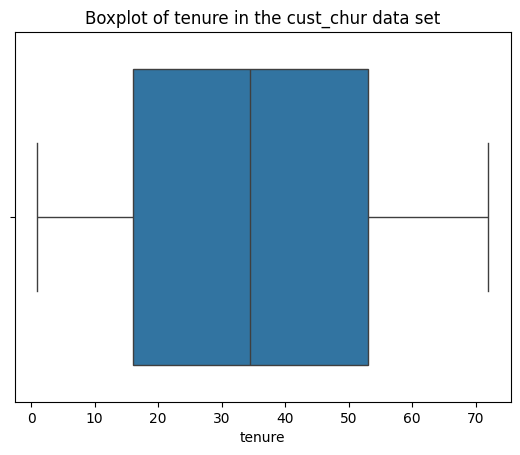

In [23]:
# Boxplot of a numeric variable: tenure
snsplot = sns.boxplot(x='tenure', data = cust_chur)
snsplot.set_title("Boxplot of tenure in the cust_chur data set")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of income in the cust_chur data set')

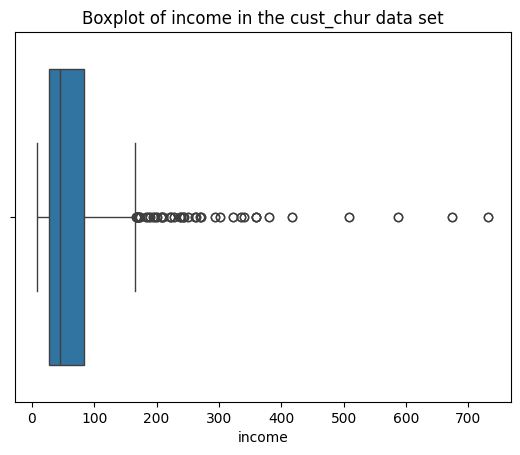

In [24]:
# Boxplot of a numeric variable: income
snsplot = sns.boxplot(x='income', data = cust_chur)
snsplot.set_title("Boxplot of income in the cust_chur data set")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of tenure of the 40 years customer in cust_chur')

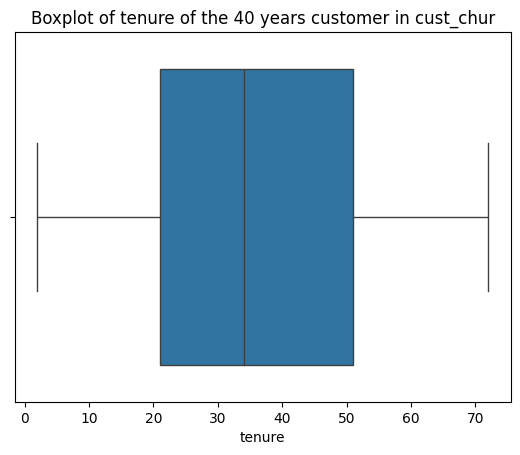

In [25]:
# Boxplot of tenure of the 40 years customer in cust_chur
snsplot = sns.boxplot(x='tenure', data = cust_chur[cust_chur['age']==40])
snsplot.set_title("Boxplot of tenure of the 40 years customer in cust_chur")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


(0.0, 240.0)

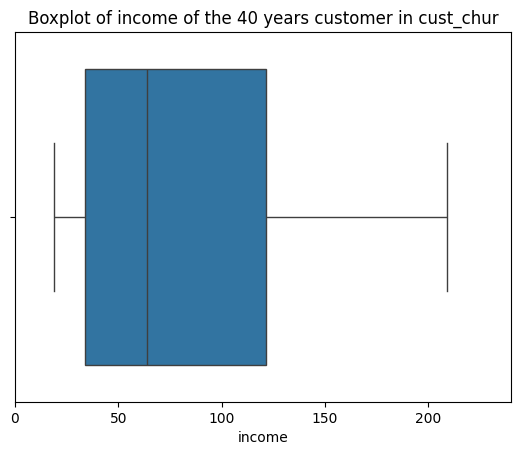

In [26]:
# Boxplot of income of the 40 years customer in cust_chur
snsplot = sns.boxplot(x='income', data = cust_chur[cust_chur['age']==40])
snsplot.set_title("Boxplot of income of the 40 years customer in cust_chur")
snsplot.set_xlim([0, 240])

Text(0.5, 1.0, 'Histogram of tenure in the cust_chur data set')

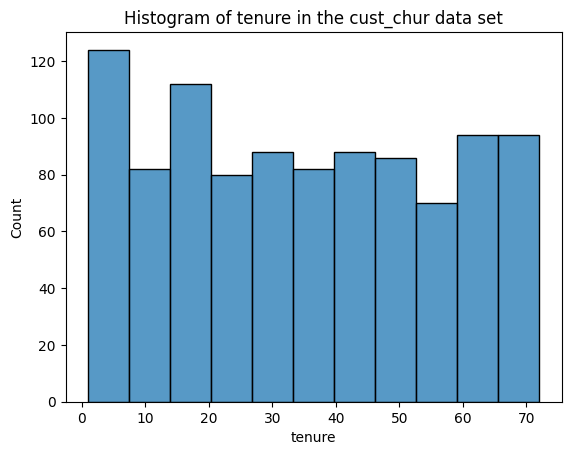

In [27]:
# Histogram of a numeric variable: tenure
snsplot = sns.histplot(x='tenure', data = cust_chur)
snsplot.set_title("Histogram of tenure in the cust_chur data set")

Text(0.5, 1.0, 'Histogram of income in the cust_chur data set')

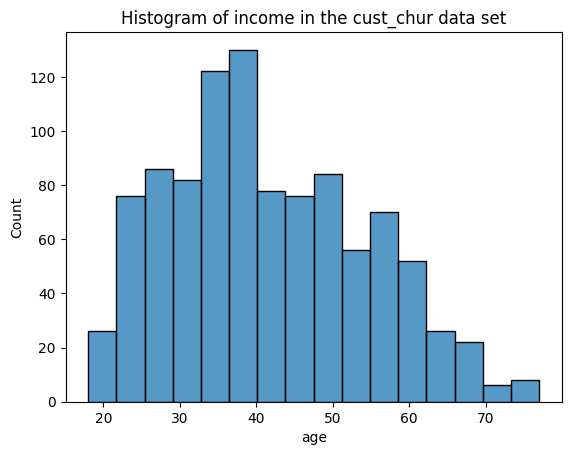

In [28]:
# Histogram of a numeric variable: age
snsplot = sns.histplot(x='age', data = cust_chur)
snsplot.set_title("Histogram of income in the cust_chur data set")

###b. Understanding a single variable: categorical variables

In [29]:
# Show the statistics of a categorical variable: churn
cust_chur['churn'].describe()

,churn
count,1000
unique,2
top,N
freq,742


In [30]:
# Show the counts of unique cust_chur types
cust_chur['churn'].value_counts()

,count
churn,
N,742
Y,258


In [31]:
# Show the counts of unique cust_chur types
cust_chur['gender'].value_counts()

,count
gender,
Y,502
N,498


In [32]:
# Show the proportion of unique cust_chur types
cust_chur['churn'].value_counts(normalize=True)

,proportion
churn,
N,0.742
Y,0.258


<ipython-input-33-57930d6967b5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'countplot of churn in the cust_chur data set')

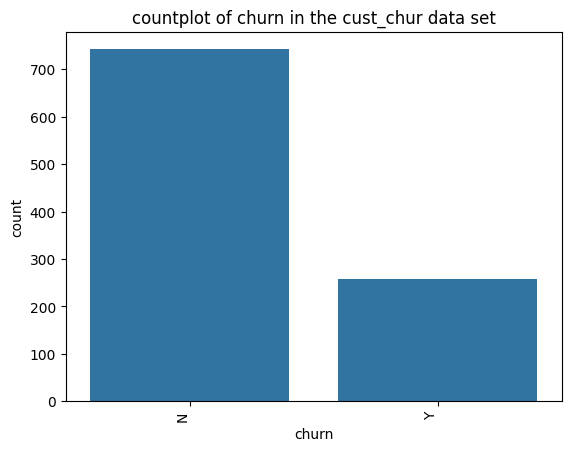

In [33]:
# Plot a categorical variable: churn
snsplot = sns.countplot(x='churn', data=cust_chur)
snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=90, ha="right")
snsplot.set_title("countplot of churn in the cust_chur data set")

Text(0.5, 1.0, 'countplot of gender in the cust_chur data set')

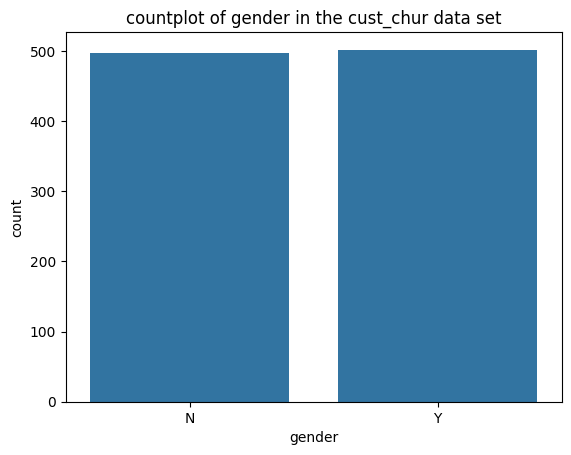

In [34]:
# Plot a categorical variable: gender
snsplot = sns.countplot(x='gender', data=cust_chur)
snsplot.set_title("countplot of gender in the cust_chur data set")

###c. Understand relationships of multiple variables

Text(0.5, 1.0, 'Scatterplot of income and age')

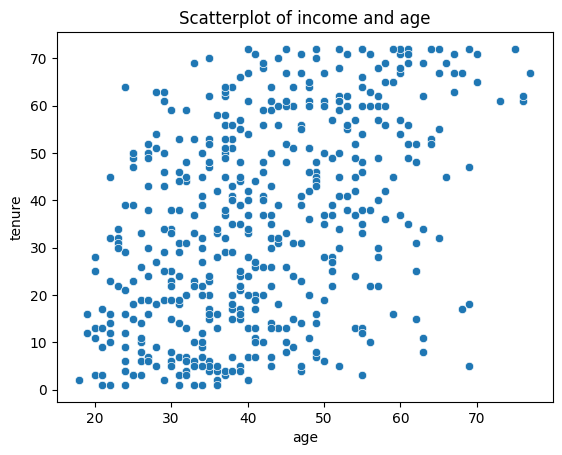

In [35]:
# scatter plot two numeric variables: age and tenure
snsplot = sns.scatterplot(x='age', y= 'tenure', data=cust_chur)
snsplot.set_title("Scatterplot of income and age")

In [36]:
# Generate correlation coefficients of two numeric variables in a 15x15 matrix: tenure, age, income, longmon, tollmon, equipmon, cardmon, wiremon, longten, tollten, equipten, cardten, wireten, loglong and lninc.
# corr() lies between -1 and 1. zero means no correlation. 1 or -1 indicates full correlation
# positive value means positive correlation and negative values mean negative relationships
cust_chur[['tenure','age','income','longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon','longten', 'tollten', 'equipten', 'cardten', 'wireten', 'loglong', 'lninc']].corr()

,tenure,age,income,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
tenure,1.000000,0.475715,0.260311,0.707012,0.183964,-0.060533,0.464380,0.122197,0.743025,0.465131,0.305777,0.671865,0.318131,0.834781,0.317191
age,0.475715,1.000000,0.375201,0.399567,0.108035,-0.087599,0.357184,0.035937,0.423347,0.255622,0.057875,0.429788,0.102269,0.423413,0.408809
income,0.260311,0.375201,1.000000,0.216594,0.169940,-0.035326,0.176103,0.098222,0.232504,0.249691,0.012987,0.203118,0.123740,0.225944,0.850498
longmon,0.707012,0.399567,0.216594,1.000000,0.132686,-0.043699,0.465429,0.070288,0.980346,0.345019,0.202495,0.648830,0.216786,0.871126,0.250000
tollmon,0.183964,0.108035,0.169940,0.132686,1.000000,0.070591,0.336954,0.462594,0.133696,0.801161,0.140615,0.235686,0.448021,0.173010,0.190633
equipmon,-0.060533,-0.087599,-0.035326,-0.043699,0.070591,1.000000,-0.003648,0.534480,-0.043922,0.064685,0.811252,-0.013271,0.425448,-0.061391,0.031592
cardmon,0.464380,0.357184,0.176103,0.465429,0.336954,-0.003648,1.000000,0.267844,0.485595,0.375519,0.164978,0.878379,0.283412,0.453414,0.215430
wiremon,0.122197,0.035937,0.098222,0.070288,0.462594,0.534480,0.267844,1.000000,0.073068,0.464628,0.522799,0.185965,0.894722,0.097626,0.141402
longten,0.743025,0.423347,0.232504,0.980346,0.133696,-0.043922,0.485595,0.073068,1.000000,0.361976,0.208251,0.689848,0.226655,0.817737,0.266258
tollten,0.465131,0.255622,0.249691,0.345019,0.801161,0.064685,0.375519,0.464628,0.361976,1.000000,0.250829,0.416629,0.583247,0.411643,0.278214


In [37]:
# Generate 2D scatter plots
sns.pairplot(data = cust_chur)

Output hidden; open in https://colab.research.google.com to view.

##2. Model Development

In [38]:
# Create dummy variables (0.5 pts)
cust_chur_2 = pd.get_dummies(cust_chur_2, columns=['region', 'marital', 'gender', 'custcat', 'tollfree', 'wireless', 'internet', 'callid', 'callwait', 'ebill'], drop_first=True, dtype = int)
cust_chur_2

,tenure,age,income,longmon,wiremon,churn,region_R2,region_R3,marital_Y,gender_Y,custcat_C2,custcat_C3,custcat_C4,tollfree_Y,wireless_Y,internet_Y,callid_Y,callwait_Y,ebill_Y
0,13,44,64,3.70,0.0,Y,1,0,1,0,0,0,0,0,0,0,0,0,0
1,68,52,116,18.15,0.0,N,0,1,1,1,0,1,0,1,0,0,1,1,0
2,23,30,30,6.30,0.0,N,1,0,1,0,0,1,0,0,0,0,1,0,0
3,45,22,19,10.90,0.0,Y,0,1,1,1,1,0,0,0,0,1,0,1,1
4,45,59,166,9.75,0.0,N,0,1,1,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,43,27,15.00,0.0,N,0,0,0,0,0,1,0,1,0,0,1,1,0
996,34,52,106,4.95,0.0,N,0,0,1,0,0,1,0,1,0,1,1,0,0
997,15,46,63,3.70,33.1,Y,0,0,1,0,0,0,1,1,1,1,1,0,1
998,7,34,22,4.65,0.0,N,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
# Examine the porportion of target variable for data set
target = cust_chur_2['churn']
print(target.value_counts(normalize=True))

churn
N    0.742
Y    0.258
Name: proportion, dtype: float64


In [40]:
# Partition the data (0.5 pts)
predictors = cust_chur_2.drop(['churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(700, 18) (300, 18) (700,) (300,)


In [41]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 'N']
minority_df = combined_train_df[combined_train_df['churn'] == 'Y']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [42]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

churn
N    0.5
Y    0.5
Name: proportion, dtype: float64 (342,)


In [43]:
# Examine the porportion of target variable for testing data set (0.5 pts)
print(target_test.value_counts(normalize=True))

churn
N    0.71
Y    0.29
Name: proportion, dtype: float64


## 3. Results and Model Evaluation

In [44]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=1)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'internet_Y <= 0.5\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = N'),
 Text(0.25, 0.5, 'tenure <= 47.5\nentropy = 0.915\nsamples = 197\nvalue = [132, 65]\nclass = N'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.993\nsamples = 133\nvalue = [73, 60]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.396\nsamples = 64\nvalue = [59, 5]\nclass = N'),
 Text(0.75, 0.5, 'tenure <= 11.5\nentropy = 0.84\nsamples = 145\nvalue = [39, 106]\nclass = Y'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.254\nsamples = 47\nvalue = [2, 45]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.956\nsamples = 98\nvalue = [37, 61]\nclass = Y')]

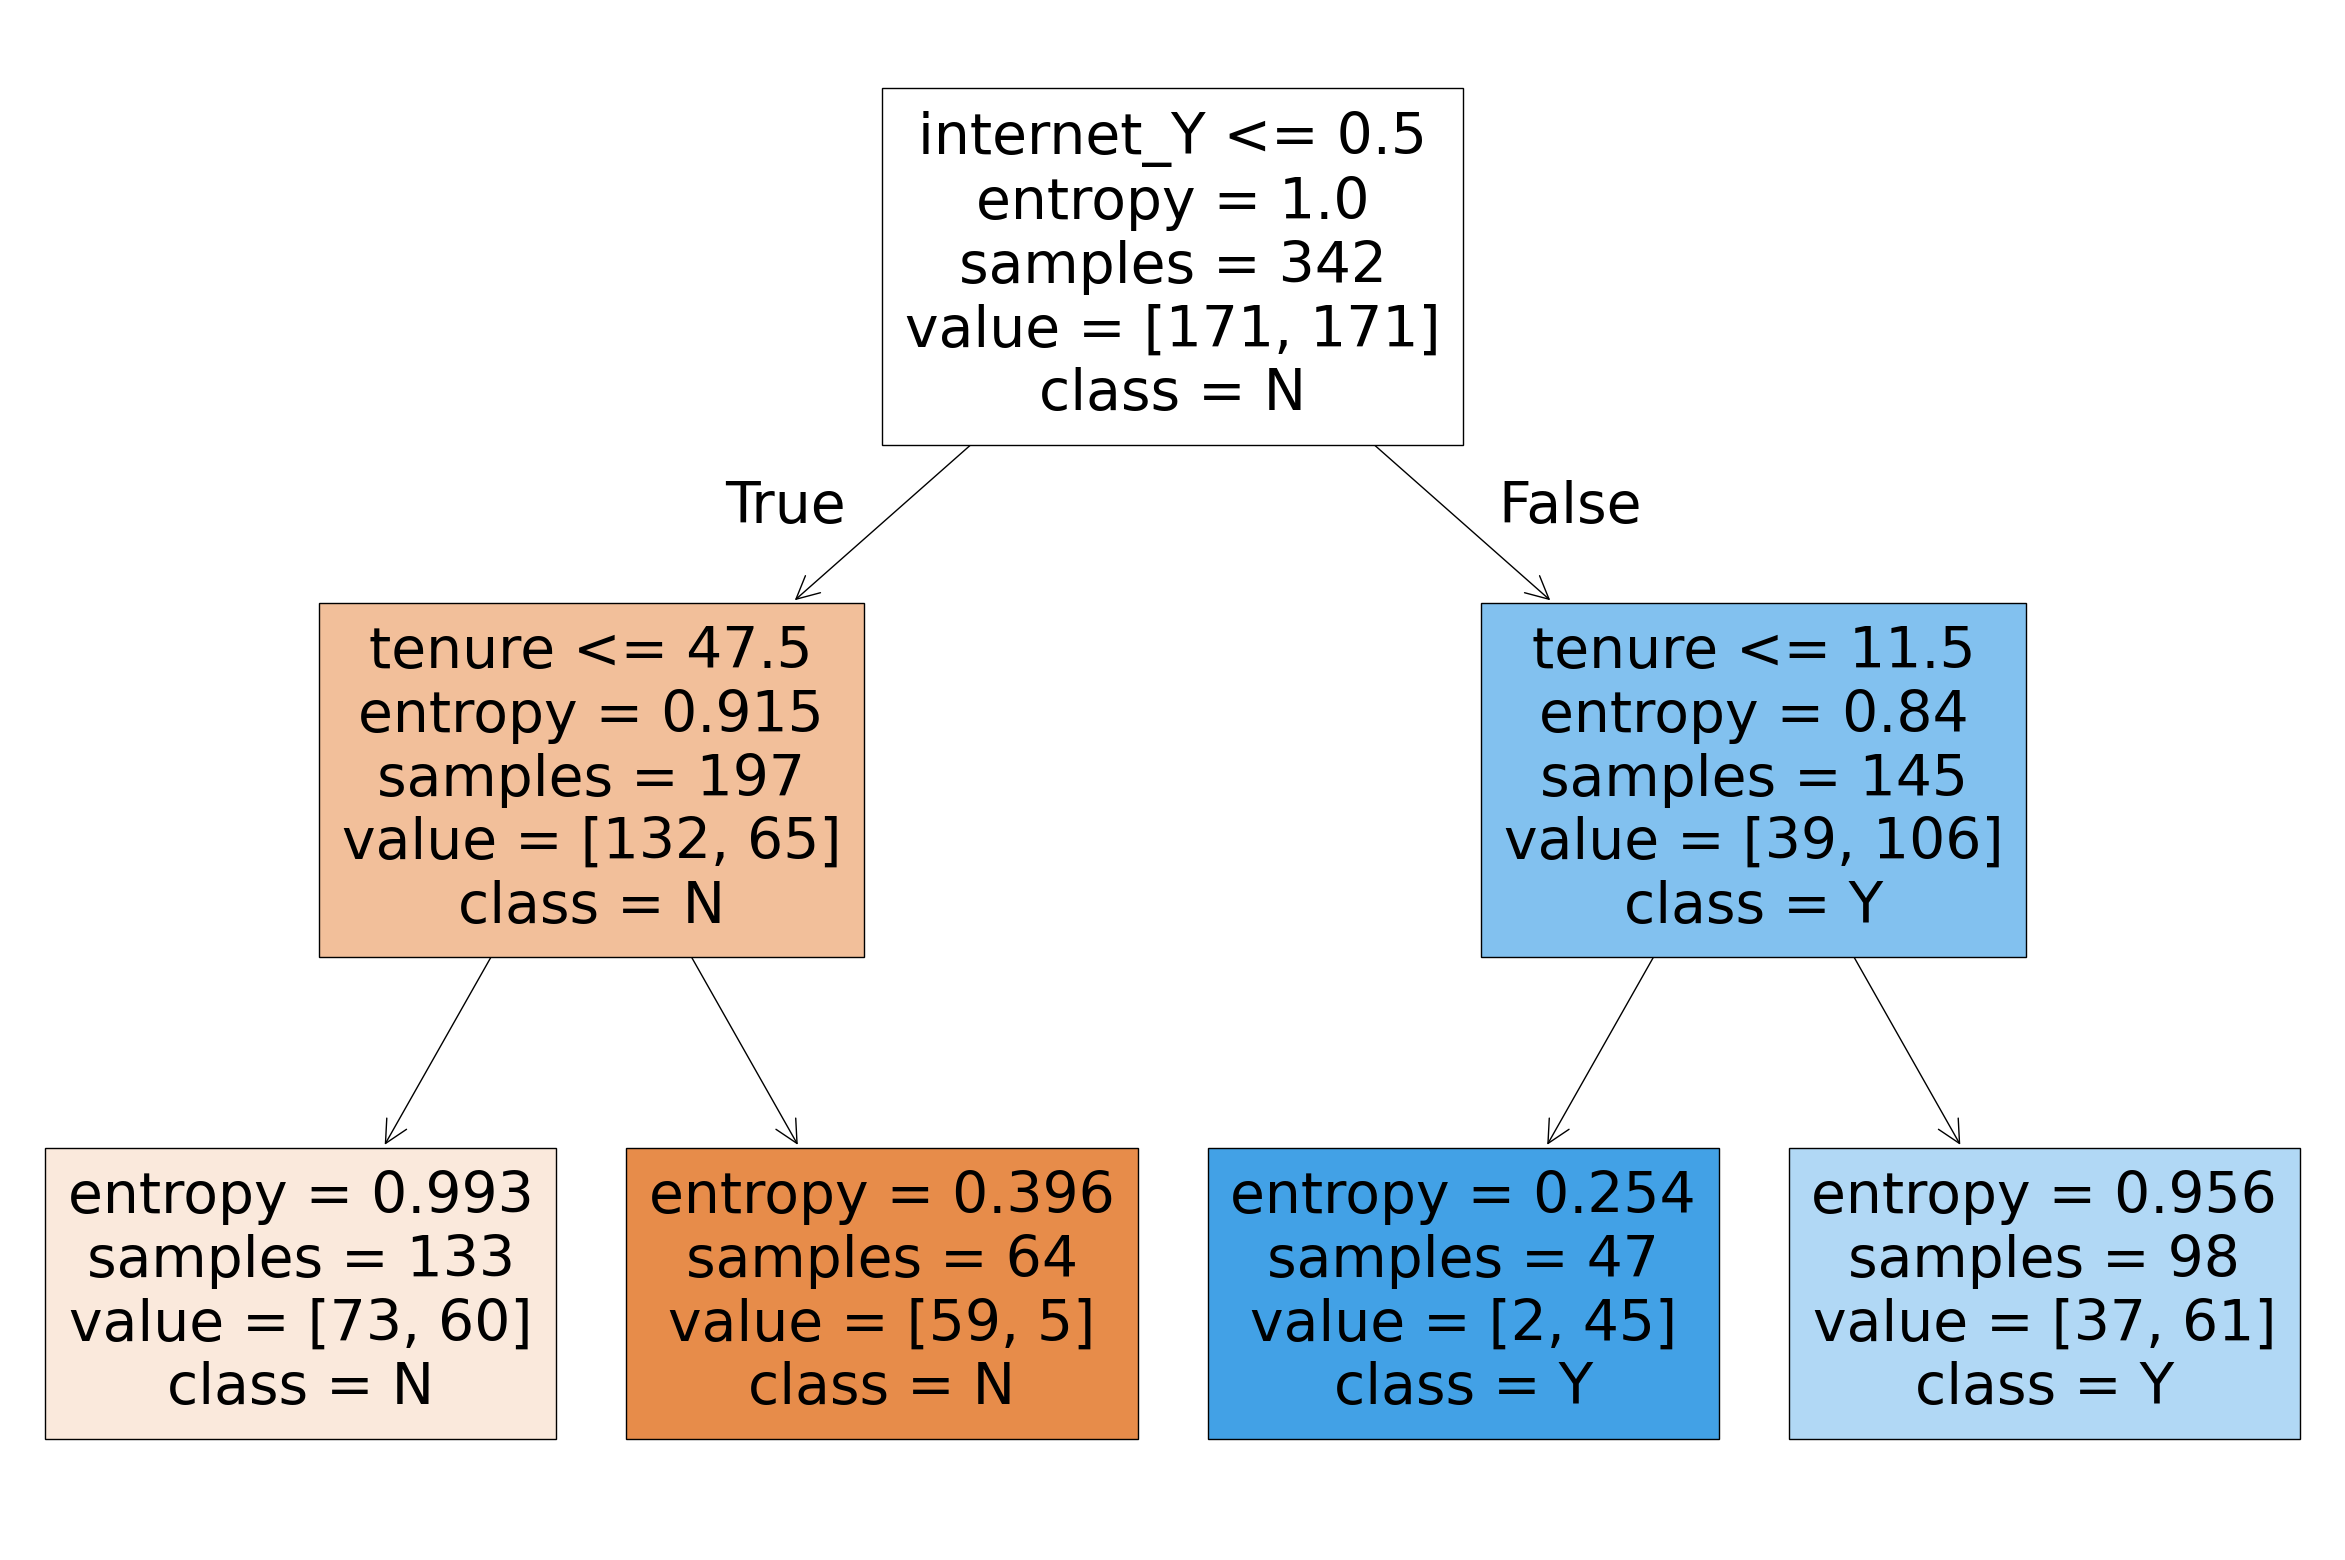

In [45]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['N','Y'],
               filled=True)

In [46]:
# Text version of decision tree (0.5 pts)
print(tree.export_text(model, feature_names=list(predictors_train.columns)))

|--- internet_Y <= 0.50
|   |--- tenure <= 47.50
|   |   |--- class: N
|   |--- tenure >  47.50
|   |   |--- class: N
|--- internet_Y >  0.50
|   |--- tenure <= 11.50
|   |   |--- class: Y
|   |--- tenure >  11.50
|   |   |--- class: Y



In [47]:
# Make predictions on testing data (0.5 pts)
prediction_on_test = model.predict(predictors_train)

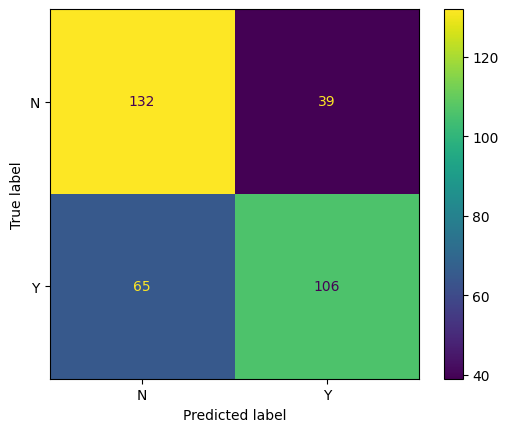

In [48]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 pts)
cm = confusion_matrix(target_train, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [49]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 pts)
print(classification_report(target_train, prediction_on_test))

              precision    recall  f1-score   support

           N       0.67      0.77      0.72       171
           Y       0.73      0.62      0.67       171

    accuracy                           0.70       342
   macro avg       0.70      0.70      0.69       342
weighted avg       0.70      0.70      0.69       342



##Conclusion

In this project, we applied a decision tree classifier to predict customer churn based on a range of demographic, financial, and service usage variables. Through careful data preprocessing, model training, and evaluation, we successfully built a model that can distinguish between churners and non-churners. The decision tree provided clear insights into the most important features influencing churn, such as customer tenure, income, and service usage patterns.

The model demonstrated reasonable performance based on accuracy, precision, and recall. While the decision tree is interpretable and useful for understanding the factors driving churn, it has limitations, such as potential overfitting and sensitivity to imbalanced data. Despite these challenges, this model can be used by businesses to take proactive measures to retain high-risk customers, thereby reducing churn rates.

Future work could involve enhancing the model by addressing class imbalance and exploring more advanced techniques like random forests or gradient boosting to improve prediction accuracy. Overall, the project demonstrates the potential of machine learning in guiding business decisions and improving customer retention strategies.

In [50]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Data_Analysis_Project/Project12.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Data_Analysis_Project/Project12.ipynb to html
[NbConvertApp] Writing 987448 bytes to /content/drive/MyDrive/Data_Analysis_Project/Project12.html
